# K Means Cluster Correlation Matrices

## Setup

Importage

In [ ]:
# Generic imports
import os,sys,glob,numpy as np,pandas as pd

# Viz stuff
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Load HCP FC data

In [5]:
r1_cms_cat_45to90 = pd.read_pickle('../data/hcp_r1_cms_cat_45to90.pkl')
r1_cms_cat_1to45 = pd.read_pickle('../data/hcp_r1_cms_cat_1to45.pkl')
r1_cms_cat = pd.concat([r1_cms_cat_1to45,r1_cms_cat_45to90],axis=0)

In [6]:
#r1_cms_cat.loc['100307']
#r1_cms_cat.loc['100307']
#r1_cms_cat= pd.read_pickle('../data/hcp_r1_cms_cat.pkl')
#r1_cms_mn = r1_cms_cat.stack('col').unstack('sub').mean(axis=1).unstack('col')

In [7]:
r1_cms_cat.shape

(36000, 400)

In [19]:
subs = np.unique(r1_cms_cat.index.get_level_values('sub'))
subs

array(['100307', '100408', '100610', '101006', '101107', '101309',
       '102008', '102109', '102311', '102513', '102614', '102715',
       '102816', '103010', '103111', '103414', '103515', '103818',
       '104012', '104416', '104820', '105014', '105115', '105923',
       '107321', '107422', '107725', '108020', '108121', '108222',
       '108525', '108828', '109325', '109830', '110007', '110411',
       '110613', '111211', '111312', '111413', '111514', '111716',
       '112112', '112516', '113215', '113316', '113619', '114419',
       '114621', '114823', '114924', '115017', '115219', '115320',
       '115724', '115825', '116524', '116726', '117021', '117324',
       '117930', '118023', '118124', '118225', '118528', '118730',
       '118831', '118932', '119025', '119126', '120111', '120414',
       '121618', '122317', '122822', '124220', '124422', '124624',
       '125222', '125424', '126325', '126426', '127226', '127327',
       '127731', '127832', '128026', '128632', '128935', '1290

In [41]:
#corrs = {}
corrs = np.zeros([len(subs), len(subs)])
mat1s,mat2s = {},{}
for sub_it,sub in enumerate(subs):
    for subsub_it,subsub in enumerate(subs):
        mat1 = r1_cms_cat.loc[sub].values
        mat2 = r1_cms_cat.loc[subsub].values
        
        mat1s[sub] = mat1
        mat2s[sub] = mat2
        

        corr =np.corrcoef(mat1.ravel(),mat2.ravel())[0,1]
        #corrs[sub,subsub] = corr
        corrs[sub_it,subsub_it] = corr

In [78]:
df_corrs = pd.DataFrame(corrs)

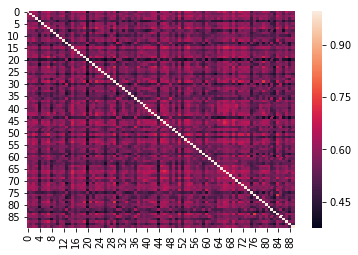

In [79]:
sns.heatmap(df_corrs)

In [45]:
from sklearn.cluster import KMeans

In [51]:
blah = KMeans()
blah.fit(df_corrs.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
blah.labels_

array([3, 0, 3, 4, 1, 0, 0, 3, 1, 0, 5, 0, 7, 6, 5, 3, 5, 3, 3, 3, 6, 0,
       4, 7, 3, 7, 1, 0, 4, 7, 6, 2, 4, 7, 5, 4, 2, 3, 4, 4, 4, 4, 0, 3,
       6, 4, 3, 3, 2, 4, 1, 3, 1, 3, 3, 7, 2, 0, 0, 6, 7, 2, 4, 5, 4, 4,
       3, 3, 4, 3, 4, 7, 3, 3, 7, 6, 0, 0, 4, 7, 3, 4, 2, 5, 7, 2, 5, 0,
       1, 4], dtype=int32)

In [55]:
df_corrs.index = blah.labels_

In [56]:
df_corrs.columns = blah.labels_

In [63]:
sortedmat = df_corrs.sort_index(axis=0).sort_index(axis=1)

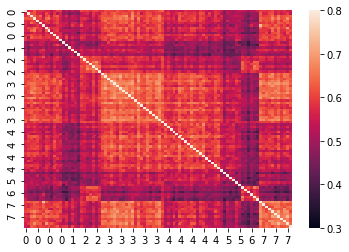

In [72]:
sns.heatmap(sortedmat,vmin=0.3,vmax=0.8)

## cluster the eigenvectors

In [73]:
#corrs = {}
corrs_evecs = np.zeros([len(subs), len(subs)])
mat1s,mat2s = {},{}
for sub_it,sub in enumerate(subs):
    for subsub_it,subsub in enumerate(subs):
        mat1 = r1_cms_cat.loc[sub].values
        mat2 = r1_cms_cat.loc[subsub].values
        
        mat1s[sub] = mat1
        mat2s[sub] = mat2
        

        mat1_evals,mat1_evecs = np.linalg.eig(mat1)
        mat2_evals,mat2_evecs = np.linalg.eig(mat2)
        
        corr =np.corrcoef(mat1_evecs.ravel(),mat2_evecs.ravel())[0,1]
        #corrs[sub,subsub] = corr
        corrs_evecs[sub_it,subsub_it] = corr

In [ ]:
df_corrs_evecs = pd.DataFrame(corrs_evecs)

blah = KMeans()
blah.fit(df_corrs_evecs.values)

df_corrs_evecs.index = blah.labels_

df_corrs_evecs.columns = blah.labels_

sortedmat = df_corrs_evecs.sort_index(axis=0).sort_index(axis=1)

In [81]:
#df_corrs_evecs

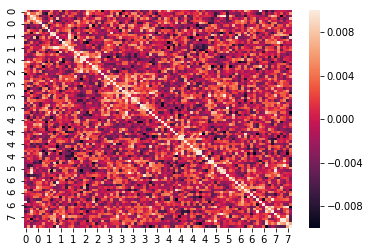

In [85]:
sns.heatmap(sortedmat,vmin=-0.01,vmax=0.01)